<a href="https://colab.research.google.com/github/RobDeutsche/CISC499/blob/main/Copy_of_Module14_Homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Change to print each group member's name:
print("Rob Deutsche")

# Homework Tasks from [Introduction to Computer Vision](https://drive.google.com/file/d/1nvyMuKLPLGd2JBhhjZUz2c5kYBLxDhk2/view?usp=sharing)

Total Points: 12


*Version 1.1*


### Challenge 1 (2 Pts): Watch the video at https://www.youtube.com/watch?v=xyfSUOfFI_E 
List down ideas of what you may like to create using the powers of Computer Vision. <br />
Can some of your ideas help to achieve the Sustainable Development Goals (SDG)?

In [1]:
#I think that anything that can be created to lower the barrier to education and encourage learning for more people that may be under resourced would be a very noble use of computer vision.  For example, automated quizzes or learning drills that require little more than a piece of paper with a grid on it and a mobile phone with a webcam.  The program can ask questions, the user can tap a specific spot on the grid to respond, and the program will give feedback based on the users answer.  Any time we can achieve more with less I think it would qualify as sustainable.

print("Part 1 - Challenge 1 Done!")

Part 1 - Challenge 1 Done!


### Challenge 2 (2 Pts): List down at least 3 examples of Computer Vision applications that you have seen in the real world

In [2]:
# Tesla's autonomous mode makes use of Computer vision to not just recognize obsticles and road inputs, but to classify these as well (red light vs green light, pedestrian vs shrub, etc..).  The combination of these makes for a pretty pleasent driving experience with a degree of safety that is very high.  Another example would be any facial recognition system such as that of Tik Tok or even the Apple Face ID system.  A third example would be the robot guidance systems employed in an Amazon warehouse automated worker, one that navigates the warehouse based on specific visual criteria, locates items, and places items in a specific area based on visual inputs.

print("Part 1 - Challenge 2 Done!")

Part 1 - Challenge 2 Done!


### Challenge 3 (4 Pts): Expand on the video example in section 1.1b, resize the video to 800x600 and display it in greyscale

In [13]:
#installing pyAV Library for video handling

!pip install av

     |████████████████████████████████| 37.2 MB 1.4 MB/s 


<IPython.core.display.Javascript object>

Saved to photo.jpg


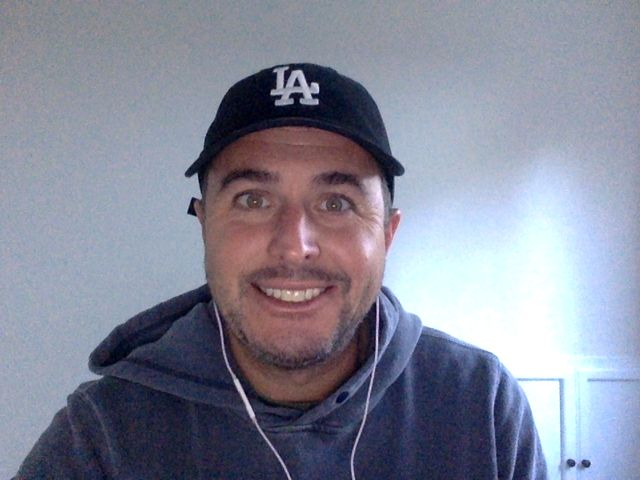

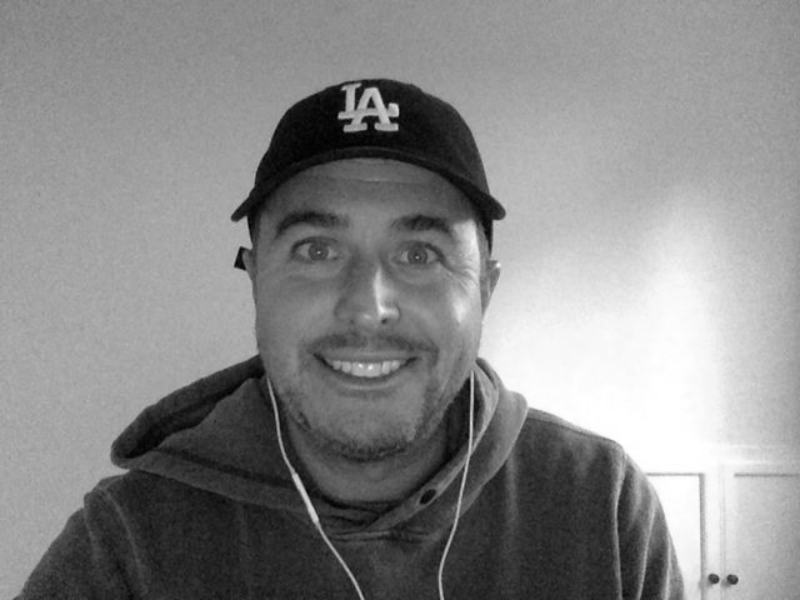

Part 1 - Challenge 3 Done!


In [21]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
from matplotlib import pyplot as plt

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

#initialize webcam and take photo
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

img_1 = load_image("photo.jpg")   #Load the image file into memory
img_1 = cv2.cvtColor(img_1,cv2.COLOR_BGR2GRAY) #convert image to grayscale
resized = cv2.resize(img_1,(800, 600))           
cv2_imshow(resized) # cv2.imshow("Resized",resized)


print("Part 1 - Challenge 3 Done!")

### Challenge 4 (4 Pts): Use the Python time library, and add a timestamp neatly to the video feed from your webcam

<IPython.core.display.Javascript object>

Saved to photo.jpg


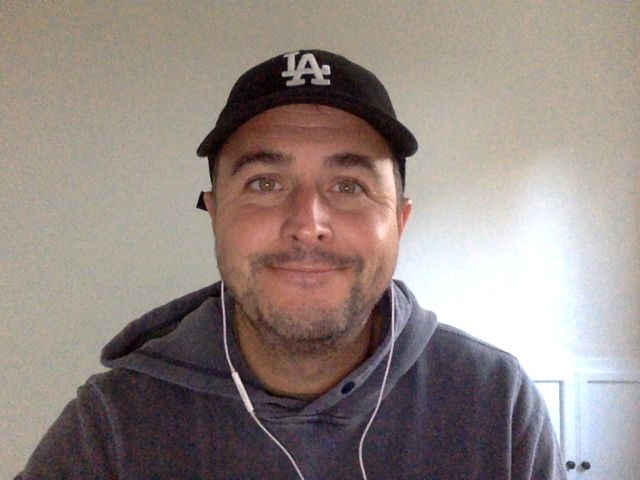

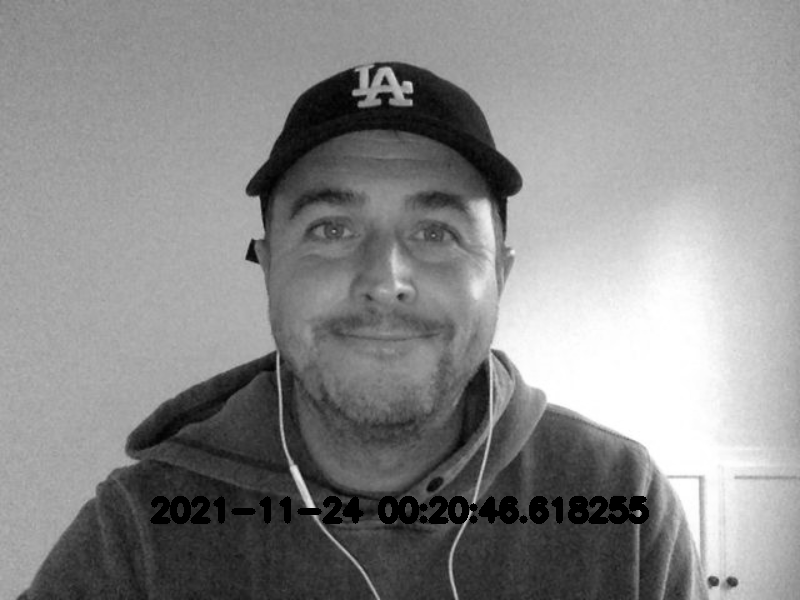

2021-11-24 00:20:46.721873
Part 1 - Challenge 4 Done!


In [49]:
from datetime import datetime
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
from matplotlib import pyplot as plt
import cv2 
from google.colab.patches import cv2_imshow
from skimage import io #  io.imread loads image as RGB

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

#initialize webcam and take photo
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

img_1 = load_image("photo.jpg")   #Load the image file into memory
img_1 = cv2.cvtColor(img_1,cv2.COLOR_BGR2GRAY) #convert image to grayscale
resized = cv2.resize(img_1,(800, 600))
timestamp = (datetime.now())
#cv2.rectangle(resized, (100, 700), (700, 370), (255,255,0), 2)      #rectangle for timestamp
cv2.putText(resized, str(timestamp), (150,520), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 5)      
cv2_imshow(resized) # cv2.imshow("Resized",resized)
print(datetime.now())

print("Part 1 - Challenge 4 Done!")

# Homework Tasks from [Computer Vision and Machine Learning](https://drive.google.com/file/d/1RSd1G4wxZJKRtLEwC1dTxPbslYIbeELY/view?usp=sharing)

Total points: 21

### Challenge 1 (3 Pts): What is the average color of https://ethaneldridge.github.io/cisc499/Module14-07-ComputerVisionAndMachineLearning/test/58.png ?

Store the result in a variable "cha1"

In [55]:
import cv2
import numpy as np

# Read the images into memory
green_card = cv2.imread("/content/58.png")

#defining averagecolor function
def averagecolor(image):
    return np.mean(image, axis=(0, 1))

cha1= averagecolor(green_card)
print(cha1)

print("Part 2 - Challenge 1 Done!")

[208.77603841 223.6275293  120.75616536]
Part 2 - Challenge 1 Done!


### Challenge 2 (3 Pts): What is the average color of https://ethaneldridge.github.io/cisc499/Module14-07-ComputerVisionAndMachineLearning/background.png ?

Store the result in a variable "cha2"

In [56]:

# Read the images into memory
background = cv2.imread("/content/background.png")

#defining averagecolor function
def averagecolor(image):
    return np.mean(image, axis=(0, 1))

cha2= averagecolor(background)
print(cha2)

print("Part 2 - Challenge 2 Done!")

[247.9326888  241.13666016 241.89832357]
Part 2 - Challenge 2 Done!


### Challenge 3 (3 Pts): What is the average color of https://ethaneldridge.github.io/cisc499/Module14-07-ComputerVisionAndMachineLearning/cardgreen_close.png ?

Store the result in a variable "cha3"

In [57]:
# Read the images into memory
green_card_close = cv2.imread("/content/cardgreen_close.png")

#defining averagecolor function
def averagecolor(image):
    return np.mean(image, axis=(0, 1))

cha3= averagecolor(green_card_close)
print(cha3)

print("Part 2 - Challenge 3 Done!")

[119.53976563 133.40338216  61.1089388 ]
Part 2 - Challenge 3 Done!


### Challenge 4 (3 Pts): 58.png vs Background. Calculate the distance between cha1 and cha2

Recall how the euclidean distance was calculated in section 1.2

In [61]:
import numpy as np
#reshape arrays and reassign values
cha1_ = cha1.reshape(3, -1)
cha2_ = cha2.reshape(3, -1)
dist = np.hypot(*(cha2_-cha1_ ))

print(dist)

print("Part 2 - Challenge 4 Done!")

[42.89304062]
Part 2 - Challenge 4 Done!


### Challenge 5 (3 Pts): 58.png vs Green. Calculate the distance between cha1 and cha3

Recall how the euclidean distance was calculated in section 1.2

In [62]:
import numpy as np
#reshape arrays and reassign values
cha1_ = cha1.reshape(3, -1)
cha3_ = cha3.reshape(3, -1)
dist = np.hypot(*(cha3_-cha1_ ))

print(dist)



print("Part 2 - Challenge 5 Done!")

[126.89960247]
Part 2 - Challenge 5 Done!


A smaller distance implies a greater similarity. Hence, 58.png was classified as more similar to the background, than to the green card based on the 4 "training images".

### Challenge 6 (3 Pts): Modify the function averagecolor to convert the image to greyscale before extracting the features

Recall how you converted an image to greyscale in the previous workshop. Calculate the accuracy of the kNN model when we use average greyscale instead of averagecolor. (i.e. Run section 1.3 using your updated averagecolor function. Rerun both the training and inference steps) What is the new accuracy? Does it perform better? Why do you think so?

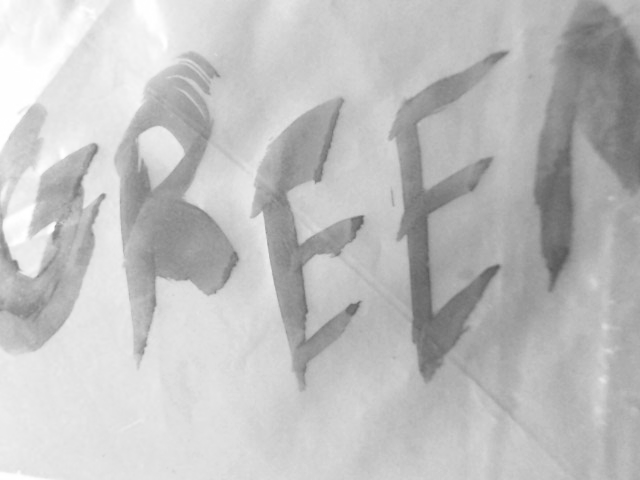

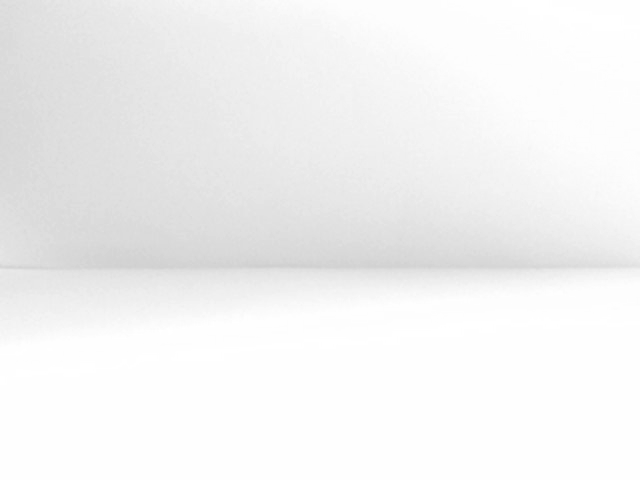

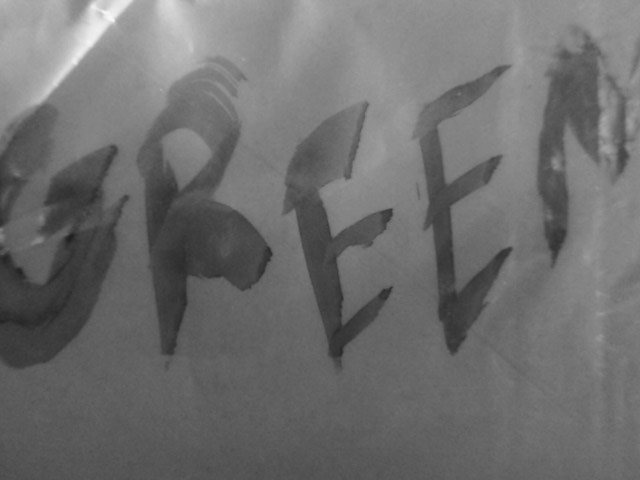

191.26522135416667
242.08150716145835
110.31154296875
[191.26522135416667, 242.08150716145835, 110.31154296875]
[42.89304062]
Part 2 - Challenge 6 Done!


In [78]:
import cv2
import numpy as np
import skimage

# Read the images into memory
green_card = cv2.imread("/content/58.png")
background = cv2.imread("/content/background.png")
green_card_close = cv2.imread("/content/cardgreen_close.png")
#convert to grayscale
green_card_gray = cv2.cvtColor(green_card, cv2.COLOR_BGR2GRAY) #Convert color from BGR to grayscale
cv2_imshow(green_card_gray)
background_gray = cv2.cvtColor(background, cv2.COLOR_BGR2GRAY) #Convert color from BGR to grayscale
cv2_imshow(background_gray)
green_card_close_gray = cv2.cvtColor(green_card_close, cv2.COLOR_BGR2GRAY) #Convert color from BGR to grayscale
cv2_imshow(green_card_close_gray)

def averagecolor_grey(image):
    return np.mean(image, axis=(0, 1))
cha1_gray = averagecolor_grey(green_card_gray)
cha2_gray = averagecolor_grey(background_gray)
cha3_gray = averagecolor_grey(green_card_close_gray)

print(cha1_gray)
print(cha2_gray)
print(cha3_gray)

calculated_distances = [cha1_gray,cha2_gray,cha3_gray]
print(calculated_distances)

 
#I have no idea.  I got this far and I am fried.  I have the average colors and a calculated distances array but for the life of me cannot remember how to calculate the distance

print(dist)



print("Part 2 - Challenge 6 Done!")       


### Challenge 7 (3 Pts): Which distance calculation metric does the sklearn kNN model use by default? Is it also the euclidean distance that we used?

You can look up https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [ ]:
# The Model Fit Method

print("Part 2 - Challenge 7 Done!")

### Extra Credit (only attempt if above challenges completed)
### Challenge 8 (4 Pts): Using the kNN algorithm, mask out just the red card from https://ethaneldridge.github.io/cisc499/Module14-07-ComputerVisionAndMachineLearning/cardmixed.png, and calculate the fraction of red pixels vs. total number of pixels in that image

In [ ]:
# Your code here

print("Part 2 - Challenge 8 Done!")

Note: In this case, we happened to be able to use the model to predict the class of each pixel because our model was built using color as a feature. However this method may not always be applicable depending on the features used for different models. You can search the Internet to explore other methods of localization. 

Artificial Neural Networks (ANN), specifically Convolutional Neural Networks (CNN) have recently become very popular due to their much higher level of effectiveness. In the next workshop, we will explore the use of some pre-trained CNNs, together with how we might run inferences using the Intel Movidus Neural Compute Stick 2 (NCS2), that is powered by the Intel Myriad VPU.

Have you heard of the DJI Tello drones? They make use of computer vision to improve the flight quality too, and they are also powered by an Intel MYRIAD VPU!
https://www.movidius.com/news/hello-tello-ryze-announces-intel-myriad-vpu-powered-toy-drone

If you remember, earlier in this lesson we also discussed about complementing machine vision with other sensors. What other sensors do you think are onboard the Tello drone apart from the camera?
https://www.ryzerobotics.com/tello/specs

What do you think the range finder and the barometer are used to sense?